# Parcial 1 Minería de datos
#### Cristian Andres Contreras Robayo

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas


In [18]:
df = pd.read_csv("/content/drive/MyDrive/PROYECTO PYTHON/student-mat.csv",
    sep = ";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Punto 1

In [ ]:
# la cantidad de datos faltantes en la base de datos es cero; no extisten valores nulos para ninguna de las variables.
df.isna().sum()

# Punto 2

In [106]:
a = df[['sex','address','school']]
a.groupby(['sex','address']).count()

school
sex address        
F   R            44
    U           164
M   R            44
    U           143

En zona rural viven en total 88 estudiantes; mientras que en zona urbana viven en total 307 estudiantes. El total de estudiantes hombres es de 187. 

# Punto 3

In [66]:
df2 = df[['sex','absences','address']]
df2 = df2[df2['absences']>5]
df3 = df2.groupby(['sex','address']).count()

absences
sex address          
F   R              20
    U              60
M   R              18
    U              48

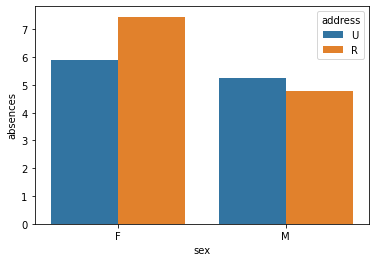

In [91]:
import seaborn as sns
sns.barplot(data = df,
            x = 'sex', 
            y = "absences",
            hue = "address",
            ci = None)

Hay 38 estudiantes que poseen más de 5 fallas en la zona rural, de ellos hay 63 que son hombres. Cunando el estudiante es una mujer; s epuede evidenciar que incurre en más ausencias que cuando es un hombre; por otro lado son las estudiantes mujeres que viven en la zona rural las que más poseen fallas.

# Punto 4

In [ ]:
pun4 = pd.pivot_table(df, index='school',columns = 'internet', aggfunc=np.mean)['G3']; pun4

In [ ]:
import seaborn as sns
sns.barplot(data = df,
            x = 'school', 
            y = "G3",
            hue = "internet",
            ci = None)

Para los estudiantes que no posee internat en sus casas  el promedio de notas de matemáticas apra 3er corte en el colegio Gabriel Pereira es de 9.67 y para los estudiantes que sí poseen internet en sus casas es de 10.63. Por otro lado en el caso del colegio Mousinho sa Silvera en primedio la calificación promedio de los estudiantes de matemáticas que si poseen internet es de 10.47 y para los que n poseen este recurso es de 8.43. 
Desde un panorama general se puede ver cómo el colegio Gabriel Pereira posee un mayor promedio en la prueba de matemáticas con respecto al otro colegio.

# Punto 5

In [ ]:
df['nota_fin'] = df['G1']*0.3+df['G2']*0.3 + df['G3']+0.4
df['nota_fin'].describe()

In [ ]:
df['nota_fin'].median()

La media de la calificación total para los 395 estudiantes de los colegios es de 17.30; la mediana es de 17.7, la mínima calififación es de 1.60 y la máxima calificación es de 31.8.

# Punto 6
Con base en la infromación presente en la base de datos; realizaría un análisis de regresión para predecir la nota final del estudiante en la asignatura de matemáticas utilizando como varibles explicativas: si el estudiante posee o no internet en la casa, el género del estudiante, el tipo de domicilio, el tiempo de viaje de la casa a la escuela, el colegio al que pertenece y el número de ausencias escolares. 